## Basit Doğrusal Regresyon

In [15]:
import pandas as pd

ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [16]:
df = df.drop(["Unnamed: 0"], axis= 1)

In [17]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [20]:
df.isnull().values.any()

False

##### >>> Dağılımını ve Korelasyonunu inceleyelim.

In [21]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


##### >>> TV satışları arttıkça satışlarında artıcağını söylüyoruz.
#### Korelasyon-Negatif-Pozitif
#### Düşük	-0,29 to -0,10-->0,10 to 0,29
#### Orta derecede	-0,49 to -0,30-->0,30 to 0,49
#### Yüksek	-0,50 to -1,00-->0,50 to 1,00

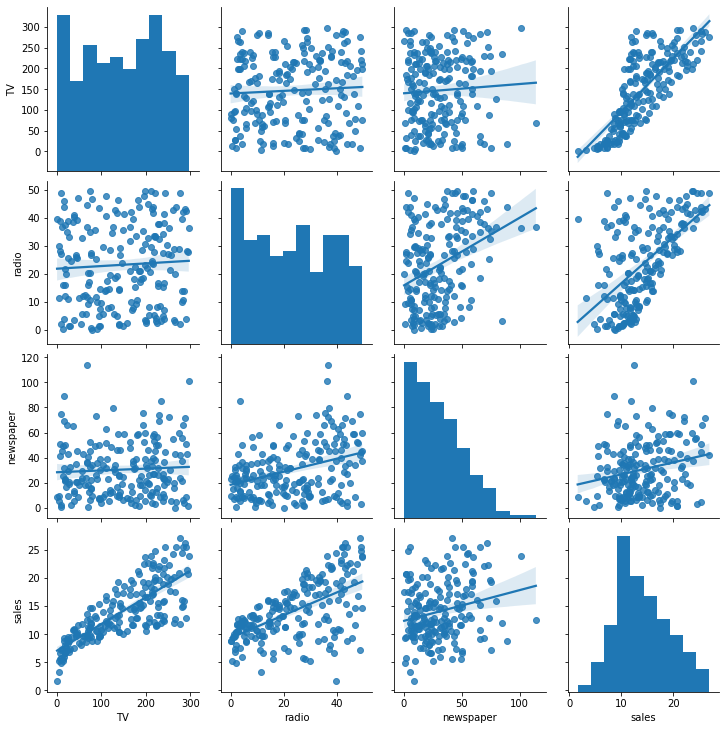

In [22]:
import seaborn as sns

sns.pairplot(df, kind= "reg");

# regresyon türünde grafikleri elde edelim.

##### >>> Eğimin işareti ve büyüklüğü ilişkiyi ifade eder.

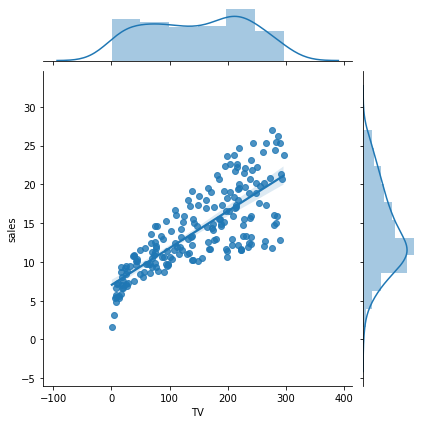

In [23]:
sns.jointplot(x= "TV", y= "sales", data= df, kind= "reg");

# TV ile sales arasındaki bağlantı grafiğini inceleyelim.

### Statsmodel ile modelleme

##### >>> X bağımsız değişken

In [24]:
import statsmodels.api as sm

In [25]:
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [29]:
X = sm.add_constant(X)

In [30]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


##### >>> y bağımlı değişken

In [31]:
y = df[["sales"]]
y[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [32]:
lm = sm.OLS(y, X) # Lineer Model

# OLS (Ordinary Least Squares) = Sıradan En Küçük Kareler

In [33]:
model = lm.fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           1.47e-42
Time:                        20:31:38   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
import statsmodels.formula.api as smf 

lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

# Farklı kullanım türü.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           1.47e-42
Time:                        14:31:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### - R-squared: Bağımsız değişkenin bağımlı değişkendeki değişkenliği açıklama başarısıdır. Açıklanabilirlik oranıdır. R2 = 1 - (AKT/OUKT)
##### R2‘ın yüksek olması regresyon model uyumunun iyi olduğunu gösterir.
##### - Adj. R-squared: Düzeltimiş R kare, R karenin her parametre eklenmesine karşı olan duyarlılığını düzenleyen (duyarlılığı daha az olan bir metriktir) değerdir. 
##### - F-statistic: Modelin anlamlılığının anlaşılması için kurulan test istatistiğidir.
##### - Prob (F-statistic): F-statistic'in P Value değeridir.
##### - No. Observations: Gözlem sayısı.
##### - Df Residuals: Serbestlik derecesi.

### Modelin Yorumlanmasında En Önemli Kısım

##### coef: Katsayı.
##### Intercept: Beta0.
##### Intercept ve coef kesişimi TV satışı olmadıgında oluşan ortamala satışı gösterir.
##### TV ile coef kesişimi TV'nin birim artışına baglı olarak satışlara etkisini gösterir.

#### >>> Modelin parametrelerini elde etme.

In [19]:
model.params 

Intercept    7.032594
TV           0.047537
dtype: float64

###### >>> beta0 ve beta1 değerlerini elde ettik.

#### >>> Kat sayı detaylarına erişelim.

In [20]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


#### >>> Güven aralıklarına erişelim.

In [21]:
model.conf_int() # confidence interval

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [22]:
model.f_pvalue # Modelin anlamlılığına ilişkin.

1.4673897001947095e-42

In [23]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [24]:
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  312.14


In [25]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

tvalue:  15.36


In [26]:
model.mse_model # Modelin anlamlışığına ilişkin model değerlendirme istatistikleri.

3314.6181668686486

In [27]:
model.rsquared

0.611875050850071

In [28]:
model.rsquared_adj

0.6099148238341623

#### Modelin tahmin ettiği değerlere erişmek.

In [29]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

#### Gerçek değerlere erişmek.

In [30]:
y[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


### Mülakatlarda çıkabilitesi yüksek !!

In [31]:
print("Sales = " + str("%.2f" % model.params[0]) + " + TV" + " * " + str("%.2f" % model.params[1]))

Sales = 7.03 + TV * 0.05


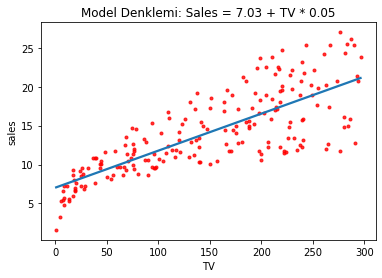

In [32]:
g = sns.regplot(df["TV"], df["sales"], ci= None, scatter_kws= {"color":"r", "s":9})
g.set_title("Model Denklemi: Sales = 7.03 + TV * 0.05");

# g.set_ytable("Satış Sayısı")
# g.set_xtable("TV Harcamaları")
# plt.xlim(-10,310)
# plt.ylim(bottom= 0);

In [33]:
from sklearn.linear_model import LinearRegression

In [71]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

# Linear Regression = Doğrusal Regresyon

In [35]:
model.intercept_

7.032593549127693

In [36]:
model.coef_

array([0.04753664])

In [37]:
model.score(X, y) # R kare değeri

0.611875050850071

In [38]:
model.predict(X)[0:10] # Model aracılığı ile tahmin edilen değerler.

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## TAHMİN

##### Model Denklemi
###### Sales = 7.03 + TV * 0.04
###### Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [39]:
7.03 + 30 * 0.04

8.23

In [40]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [41]:
model.predict([[30]]) # Modeli kullanarak tahmin etme işlemi.

array([8.45869276])

In [42]:
yeni_veri = [[5],[90],[200]]

In [43]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [46]:
mse = mean_squared_error(y, model.fittedvalues)

In [47]:
mse

10.512652915656757

In [48]:
print(f"Hata Kareler Ortlaması(MSE) = {mse}")

Hata Kareler Ortlaması(MSE) = 10.512652915656757


In [49]:
import numpy as np

In [50]:
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [51]:
reg.predict(X)[0:10] 

# reg --> Regression Modeli 
# Predict --> Tahmin

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [52]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [53]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

In [54]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [55]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [56]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [57]:
k_t["hata_kare"] = k_t["hata"]**2

In [58]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [59]:
np.sum(k_t["hata_kare"])

# Toplam Hata

92.90350329638103

In [60]:
np.mean(k_t["hata_kare"])

# Hata Kareler Ortalaması

9.290350329638105

In [61]:
np.sqrt(np.mean(k_t["hata_kare"]))

# Hata kareler ortalamasının karekökü

3.048007599996776

In [62]:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

In [63]:
import matplotlib.pyplot as plt

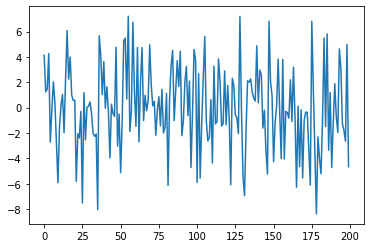

In [64]:
plt.plot(model.resid);

# Artıkların görselleştirilmesi